# Cubical Persistence Homology

In [1]:
import numpy as np
from skimage.transform import resize
from skimage.color import rgb2gray
from gtda.images import Binarizer, HeightFiltration
from gtda.homology import CubicalPersistence
from gtda.diagrams import PersistenceImage
from tqdm import tqdm

# Load images from .npy file
images = np.load('./training_data/vessels_seg.npy')

# Initialize list to store resized grayscale images
resized_images = []

print('Resizing...')
# Resize images to 28x28 and convert to grayscale
for img in tqdm(images):
    img_resized = resize(img, (28, 28), anti_aliasing=True)
    # img_gray = rgb2gray(img_resized)
    resized_images.append(img_resized)

# Convert list of resized images to a NumPy array
resized_images_np = np.array(resized_images)

# # Initialize the pipeline components
# binarizer = Binarizer(threshold=0.4)
# height_filtration = HeightFiltration()
# cubical_persistence = CubicalPersistence(n_jobs=-1)  # Use all available CPUs
# persistence_image = PersistenceImage(sigma=1.0, n_bins=2, n_jobs=-1)

# # Initialize list to store persistence images
# persistence_images_np = []

# # Process each resized and binarized image to compute persistence images
# for img in tqdm(resized_images_np):
#     img_binarized = binarizer.fit_transform(img.reshape((1, *img.shape)))
#     img_filtered = height_filtration.fit_transform(img_binarized)
#     diagrams = cubical_persistence.fit_transform(img_filtered)
#     p_imgs = persistence_image.fit_transform(diagrams)
    
#     # Store the persistence image in a list
#     persistence_images_np.append(p_imgs[0])

# # Convert list of persistence images to a NumPy array
# persistence_images_np = np.array(persistence_images_np)

# print(f"Shape of the persistence images array: {persistence_images_np.shape}")


Resizing...


100%|█████████████████████████████████████| 3150/3150 [00:02<00:00, 1366.13it/s]


In [6]:
cp = CubicalPersistence(homology_dimensions=[1], coeff=2, periodic_dimensions=None)

In [11]:
persistence = cp.fit_transform(resized_images)

In [14]:
resized_images[0].reshape(1,28,28)

(28, 28)

In [12]:
persistence.shape

(3150, 94, 3)

In [5]:
from gtda.diagrams import PersistenceImage

In [3]:
pi_res = 30
sigma = 0.2

pi = PersistenceImage(sigma=sigma, n_bins=pi_res, weight_function=None)
persistence_images = pi.fit_transform(persistence)[:,0]

In [18]:
persistence_images.shape

(3150, 30, 30)

In [21]:
per_cub_images = []
for i in range(3150):
    cp = CubicalPersistence(homology_dimensions=[1], coeff=2, periodic_dimensions=None)
    persistence = cp.fit_transform(resized_images[i].reshape(1,28,28))
    pi = PersistenceImage(sigma=sigma, n_bins=pi_res, weight_function=None)
    persistence_image = pi.fit_transform(persistence)[:,0]
    per_cub_images.append(persistence_image)

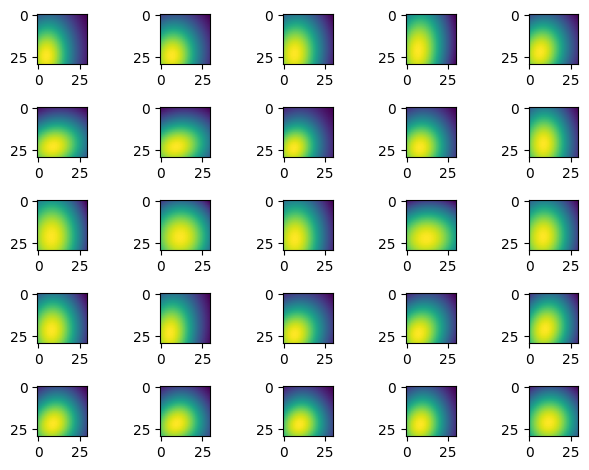

In [22]:
for i in range(191,216):
    plt.subplot(5,5,(i%25)+1)
    plt.imshow(per_cub_images[i][0])
plt.tight_layout()

100%|█████████████████████████████████████████| 244/244 [03:55<00:00,  1.04it/s]


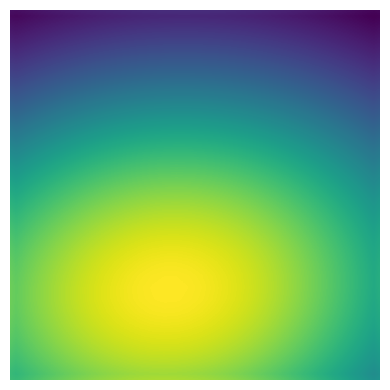

In [38]:
plt.rcParams['figure.figsize']=(4,4)
for i in tqdm(range(2906, 3150)):
    plt.imshow(resize(per_cub_images[i][0], (224,224)))
    plt.axis('off')  # Turn off the axes
    plt.gca().xaxis.set_major_locator(plt.NullLocator())  # Remove the white space
    plt.gca().yaxis.set_major_locator(plt.NullLocator())  # around the image
    plt.savefig(f'./tda/{i}.jpg', bbox_inches='tight', pad_inches=0)
plt.tight_layout()

# Vietoris-Rips Homology

In [39]:
resized_images = np.array(resized_images)

In [40]:
resized_images.shape

(3150, 28, 28)

In [45]:
point_clouds = [np.column_stack(np.where(img > np.percentile(img, 50))) for img in resized_images]  # Top 25% intensity

# Compute Vietoris-Rips persistence diagrams
vr = VietorisRipsPersistence(metric='euclidean', homology_dimensions=[0, 1], n_jobs=-1)
diagrams = vr.fit_transform(point_clouds)

In [43]:
from gtda.diagrams import PersistenceImage
from gtda.homology import VietorisRipsPersistence

In [44]:
per_vr_images = []
for i in range(3150):
    point_clouds = [np.column_stack(np.where(resized_images[i] > np.percentile(img, 50)))]
    vr = VietorisRipsPersistence(metric='euclidean', homology_dimensions=[1], n_jobs=-1)
    diagrams = vr.fit_transform(point_clouds)
    # persistence = cp.fit_transform(resized_images[i].reshape(1,28,28))
    persistence_image = PersistenceImage(n_bins=30, sigma=1, weight_function=None)
    vr_pers_images = persistence_image.fit_transform(diagrams)
    per_vr_images.append(vr_pers_images)

In [51]:
per_vr = [per_vr_images[i][0][0].reshape(30,30,1) for i in range(3150)]

In [52]:
per_vr[0].shape

(30, 30, 1)

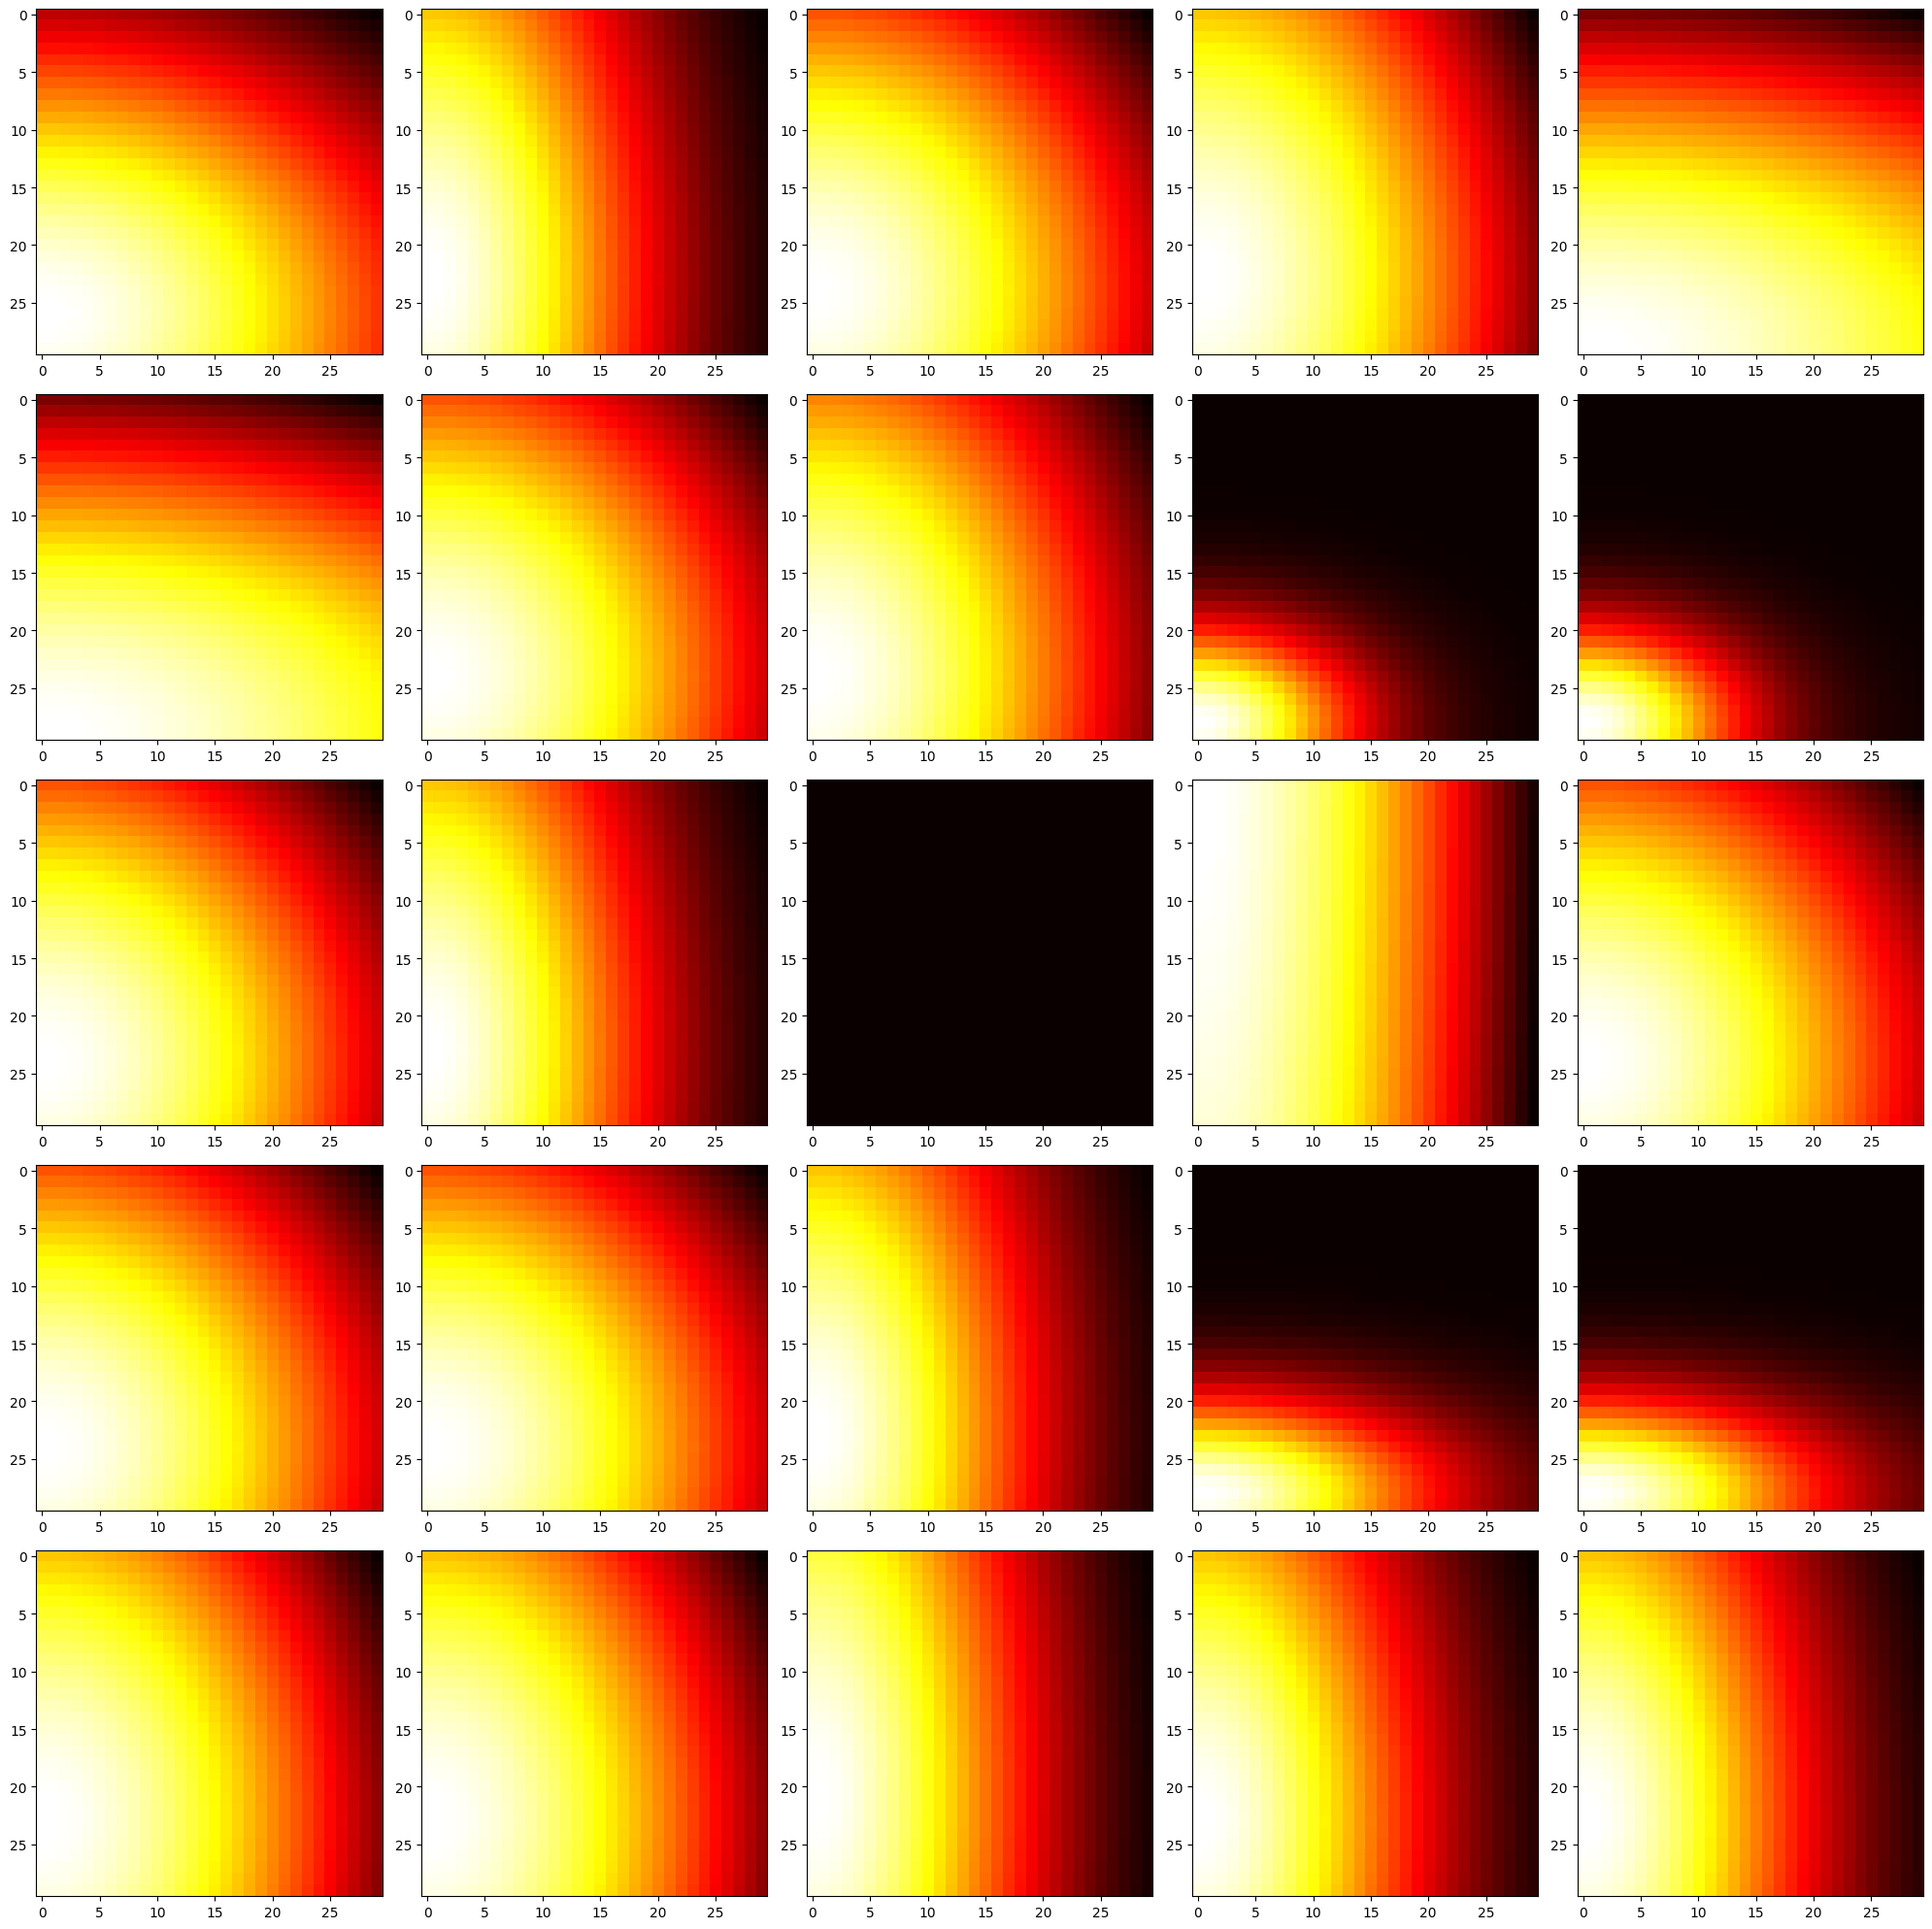

In [53]:
plt.rcParams['figure.figsize'] = (20,20)
for i in range(25):
    plt.subplot(5,5,(i%25)+1)
    plt.imshow(per_vr[i], cmap='hot')
plt.tight_layout()

100%|█████████████████████████████████████████| 275/275 [04:44<00:00,  1.03s/it]


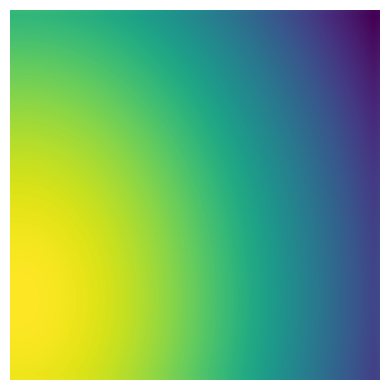

In [59]:
plt.rcParams['figure.figsize']=(4,4)
for i in tqdm(range(2875, 3150)):
    plt.imshow(resize(per_vr[i], (224,224)))
    plt.axis('off')  # Turn off the axes
    plt.gca().xaxis.set_major_locator(plt.NullLocator())  # Remove the white space
    plt.gca().yaxis.set_major_locator(plt.NullLocator())  # around the image
    plt.savefig(f'./tda_vr/{i}.jpg', bbox_inches='tight', pad_inches=0)
plt.tight_layout()